In [16]:
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
L_s = 0.433
L_r = 0.623
L_m = 8.71

R_s = 0.05
R_r = 0.05
R_c = 0.05

J = 0.1

T_L = 0
P = 4

def dxdt(t, x, v, omega_s):
    i_s = x[0]
    i_r = x[1]
    i_m = x[2]
    omega_r = x[3]
    
    s = (omega_s - omega_r) / omega_s

    E_1 = R_c * (i_s - i_m - i_r)

    dis_dt = (1 / (L_s / omega_s)) * (v - R_s * i_s - E_1)
    dir_dt = (1 / (L_r / omega_s)) * (E_1 - (R_r / s) * i_r)
    dim_dt = (1 / (L_m / omega_s)) * E_1
    
    dwr_dt = (1 / J) * (3 * ((P / 2) ** 2) * ((i_r * i_r * R_r) / (s * omega_r)) - T_L)
    
    return [dis_dt, dir_dt, dim_dt, dwr_dt]


In [77]:
s0 = [0.1, 0.1, 0.1, 0.1]
t0 = 0

solver = integrate.ode(dxdt)

solver.set_integrator('dopri5')
solver.set_initial_value(s0, t0)
solver.set_f_params(105, 2 * math.pi * 400)

t_end = 0.5
dt = 0.0005

omega = []
power = []
t = []

while solver.successful() and solver.t < t_end:
    i_s, i_r, i_m, w_r = solver.integrate(solver.t+dt)
    
    w_s = 2 * math.pi * 400

    s = (w_s - w_r) / w_s

    powe = (3 * i_r * i_r * R_r * (1 - s)) / s

    t.append(solver.t)
    power.append(powe)
    omega.append(w_r)


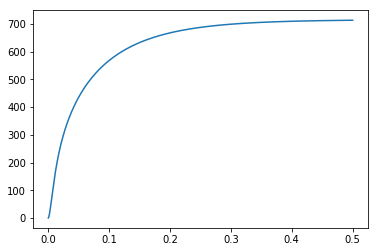

In [78]:
plt.plot(t, omega)

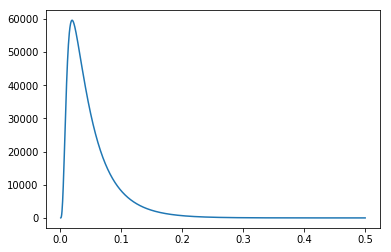

In [72]:
plt.plot(t, power)

In [63]:
A = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0.5, 1]])

In [68]:
np.linalg.inv(A).dot([-1, 4, 1])

array([-1.,  4., -1.])